![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-7/master/files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop_duplicates()
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

<Axes: >

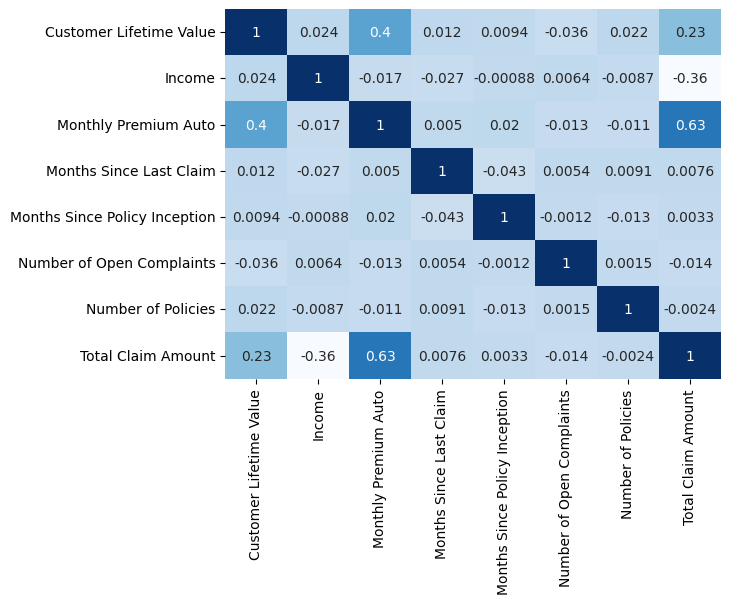

In [5]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', cbar=False)

In [6]:
y = data['Total Claim Amount']
x = data.drop('Total Claim Amount', axis=1)

In [7]:
x_cat = x.select_dtypes(include='object')
x_num = x.select_dtypes(include=('float', 'int'))

In [8]:
x_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [9]:
x_num = x_num.drop(['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies'], axis=1)
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints
0,2763.519279,56274,69,0
1,6979.535903,0,94,0
2,12887.431650,48767,108,0
3,7645.861827,0,106,0
4,2813.692575,43836,73,0
...,...,...,...,...
9129,23405.987980,71941,73,0
9130,3096.511217,21604,79,0
9131,8163.890428,0,85,3
9132,7524.442436,21941,96,0


In [10]:
x_cat = x_cat.drop(['Customer', 'State', 'Response', 'Coverage', 'Education','Effective To Date', 'Location Code','Marital Status', 'Gender', 'Policy', 'Renew Offer Type','Sales Channel','EmploymentStatus'], axis=1)
x_cat

,Policy Type,Vehicle Class,Vehicle Size
0,Corporate Auto,Two-Door Car,Medsize
1,Personal Auto,Four-Door Car,Medsize
2,Personal Auto,Two-Door Car,Medsize
3,Corporate Auto,SUV,Medsize
4,Personal Auto,Four-Door Car,Medsize
...,...,...,...
9129,Personal Auto,Four-Door Car,Medsize
9130,Corporate Auto,Four-Door Car,Medsize
9131,Corporate Auto,Four-Door Car,Medsize
9132,Personal Auto,Four-Door Car,Large


In [11]:
SStransformer = StandardScaler().fit(x_num)
x_standard = SStransformer.transform(x_num)
x_standard

array([[-0.76287773,  0.61282744, -0.70392465, -0.42224956],
       [-0.14924546, -1.23961684,  0.02269103, -0.42224956],
       [ 0.71063622,  0.36570978,  0.42959581, -0.42224956],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062,  2.87324529],
       [-0.06993547, -0.51735647,  0.08082028, -0.42224956],
       [-0.78495478, -1.23961684, -0.47140763, -0.42224956]])

In [12]:
MMtransformer = MinMaxScaler().fit(x_num)
x_mm = SStransformer.transform(x_num)
x_mm

array([[-0.76287773,  0.61282744, -0.70392465, -0.42224956],
       [-0.14924546, -1.23961684,  0.02269103, -0.42224956],
       [ 0.71063622,  0.36570978,  0.42959581, -0.42224956],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062,  2.87324529],
       [-0.06993547, -0.51735647,  0.08082028, -0.42224956],
       [-0.78495478, -1.23961684, -0.47140763, -0.42224956]])

In [13]:
Ntransformer = Normalizer().fit(x_num)
x_norm = Ntransformer.transform(x_num)
x_norm

array([[4.90491335e-02, 9.98795616e-01, 1.22466676e-03, 0.00000000e+00],
       [9.99909320e-01, 0.00000000e+00, 1.34667229e-02, 0.00000000e+00],
       [2.55493992e-01, 9.66808272e-01, 2.14110553e-03, 0.00000000e+00],
       ...,
       [9.99945735e-01, 0.00000000e+00, 1.04111377e-02, 3.67451919e-04],
       [3.24391519e-01, 9.45913851e-01, 4.13872338e-03, 0.00000000e+00],
       [9.99565713e-01, 0.00000000e+00, 2.94683642e-02, 0.00000000e+00]])

In [14]:
#sns.distplot(x_norm)

In [15]:
print(x_cat['Policy Type'].unique())
print(x_cat['Vehicle Class'].unique())
print(x_cat['Vehicle Size'].unique())

['Corporate Auto' 'Personal Auto' 'Special Auto']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [16]:
onehot_encoder = OneHotEncoder().fit(x_cat)
encoded = onehot_encoder.transform(x_cat).toarray()
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [17]:
encoded.shape

(9134, 12)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_standard,y,test_size=0.2,random_state=23)

In [19]:
len(X_train) == len(y_train)

True

In [20]:
from sklearn import linear_model
lm = linear_model.LinearRegression().fit(X_train, y_train)

In [21]:
predict = lm.predict(X_test)
predict

array([ 404.01968877,  484.34320744,  362.0553358 , ...,  506.19145234,
        214.08146647, 1181.58567433])

In [22]:
y_train

5190     117.871165
1662      73.719521
2139    1116.000000
3801     206.950760
2399     353.778990
           ...     
3674     599.000883
39       157.397849
347      260.879903
6175    1956.368115
8787     384.000000
Name: Total Claim Amount, Length: 7307, dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,predict)

0.5201566051085231

## Ya que obtuvimos un r-cuadrada "mala" trataremops de mejorar el modelo 

### Ahora trataremos de mejorar el modelo cambiando el testsize

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_standard,y,test_size=0.1,random_state=23)
lm = linear_model.LinearRegression().fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test,predict)

0.5103452406445772

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_standard,y,test_size=0.8,random_state=23)
lm = linear_model.LinearRegression().fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test,predict)

0.5141565606477481

#### Cambiando el ratio del train test no influye mucho en el modelo

### Ahora trataremos de mejorar el modelo cambiando el normalizador numerico

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_norm,y,test_size=0.2,random_state=23)
lm = linear_model.LinearRegression().fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test,predict)

0.197638540812215

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_mm,y,test_size=0.2,random_state=23)
lm = linear_model.LinearRegression().fit(X_train, y_train)
predict = lm.predict(X_test)
r2_score(y_test,predict)

0.5201566051085231

In [42]:
X_test[0]

array([-0.83437258, -1.23961684, -0.84924779, -0.42224956])

In [43]:
y[0]

384.811147

In [39]:
lm.predict([[-0.83437258, -1.23961684, -0.84924779, -0.42224956]])

array([404.01968817])